In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from src.wmfact import WeightedMatrixFactorization

In [20]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

# create the feedback matrix: rows are users, columns are movies, values are ratings
feedbacks = ratings.pivot_table(values='rating', index=['user_id'], columns=['movie_id']).values
feedbacks

array([[ 5.,  3.,  4., ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 5., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  5., nan, ..., nan, nan, nan]])

# Training

In [9]:
# read the parameters for the model:
params = pd.read_csv("params.csv")
n_latents = 100 #params['n_latents'][0]
n_iter = 30 #params['n_iter'][0]
lambda_reg = 0.05 #params['lambda_reg'][0]
w_obs = 1.0 #params['w_obs'][0]
w_unobs = 0.1 #params['w_unobs'][0]

# create the model
model = WeightedMatrixFactorization(
    feedbacks=feedbacks,
    n_latents=n_latents,
    n_iter=n_iter,
    w_obs=w_obs,
    w_unobs=w_unobs,
    lambda_reg=lambda_reg,
    #seed=50
)

# fit the model
history = model.fit(
    method='wals', 
    verbose=True
)

# save the model
#model.save('./model.pkl')

** fitting the model with wals method **
Loss: 78932.340, iteration: 1/30
Loss: 28549.580, iteration: 2/30
Loss: 22647.977, iteration: 3/30
Loss: 20322.407, iteration: 4/30
Loss: 19165.311, iteration: 5/30
Loss: 18501.968, iteration: 6/30
Loss: 18080.947, iteration: 7/30
Loss: 17797.672, iteration: 8/30
Loss: 17605.031, iteration: 9/30
Loss: 17463.515, iteration: 10/30
Loss: 17361.463, iteration: 11/30
Loss: 17283.711, iteration: 12/30
Loss: 17222.884, iteration: 13/30
Loss: 17172.954, iteration: 14/30
Loss: 17133.739, iteration: 15/30
Loss: 17107.167, iteration: 16/30
Loss: 17073.670, iteration: 17/30
Loss: 17050.999, iteration: 18/30
Loss: 17034.582, iteration: 19/30
Loss: 17022.175, iteration: 20/30
Loss: 17008.362, iteration: 21/30
Loss: 16995.873, iteration: 22/30
Loss: 16988.386, iteration: 23/30
Loss: 16981.480, iteration: 24/30
Loss: 16972.374, iteration: 25/30
Loss: 16963.387, iteration: 26/30
Loss: 16959.949, iteration: 27/30
Loss: 16958.484, iteration: 28/30
Loss: 16947.579,

In [21]:
# predict a rating for a user and a movie
user_id = 1
movie_id = 1
rating = model.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id} is {rating}")
print(f"Actual rating for user {user_id} and movie {movie_id} is {feedbacks[user_id, movie_id]}")

Predicted rating for user 1 and movie 1 is 0.6031591099770597
Actual rating for user 1 and movie 1 is nan


# Plot the loss

Matplotlib is building the font cache; this may take a moment.


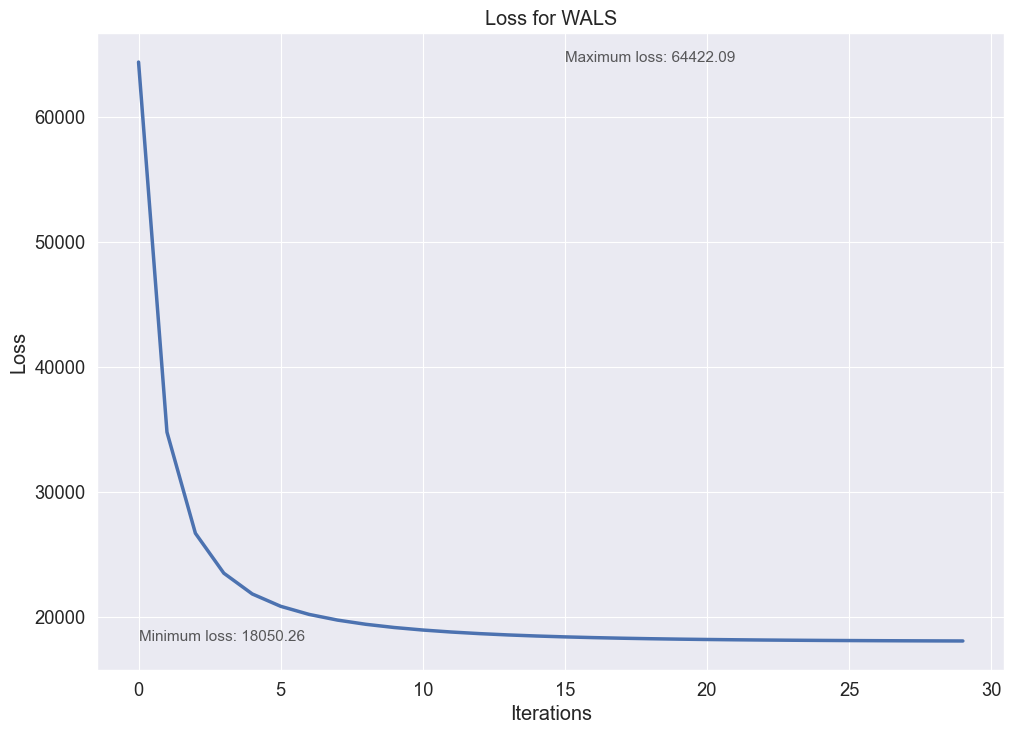

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})


lists = sorted(history.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

# lineplot 
sns.lineplot(x=list(history.keys()), y=list(history.values()))

# text for the minimum value with loss truncated to 3 decimals
plt.text(0, min(history.values())-0.05, f"Minimum loss: {min(history.values()):.2f}", fontsize=11, alpha=0.75)
# text for the maximum value with loss truncated to 3 decimals
plt.text(15, max(history.values())+0.05, f"Maximum loss: {max(history.values()):.2f}", fontsize=11, alpha=0.75)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss for WALS")
plt.show()